TO PREDICT THE GIVEN USER IS DEFAULTER OR NON DEFAULTER WITH SOME GIVEN INDEPENDENT FEATURES USING DECSION TREE MODEL

In [1]:
# To plot all the graph within the note book 
%matplotlib inline

In [22]:
#importing all the required libraries 

import numpy as np
import pandas as pd 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns 

In [9]:
#loading the datset 

df=pd.read_csv("credit.csv")
df=pd.DataFrame(df)

In [10]:
#displaying dataset to know about independent and dependent variables 
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [11]:
#checking the size of the dataset 
df.shape

(1000, 17)

In [14]:
#to display the datatypes of each column 
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

In [15]:
df.describe()
#we can observe that this function applied to only numerical columns 

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [17]:
df.describe(include=[np.number])

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [16]:
#To check for null values in the data set 
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [19]:
#by the above info we can notice that there are more number of non-numerical columns
# converting them into numerical type

for feature in df.columns:
    if df[feature].dtype=='object':
        df[feature]=pd.Categorical(df[feature]).codes
        

In [20]:
df.dtypes

checking_balance         int8
months_loan_duration    int64
credit_history           int8
purpose                  int8
amount                  int64
savings_balance          int8
employment_duration      int8
percent_of_income       int64
years_at_residence      int64
age                     int64
other_credit             int8
housing                  int8
existing_loans_count    int64
job                      int8
dependents              int64
phone                    int8
default                  int8
dtype: object

In [21]:
df.describe()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.582000,20.903000,1.07000,2.540000,3271.258000,2.1450,1.525000,2.973000,2.845000,35.546000,0.908000,1.071000,1.407000,1.274000,1.155000,0.404000,0.300000
std,1.253334,12.058814,1.05935,1.607789,2822.736876,1.1114,1.344315,1.118715,1.103718,11.375469,0.421561,0.531264,0.577654,0.946478,0.362086,0.490943,0.458487
min,0.000000,4.000000,0.00000,0.000000,250.000000,0.0000,0.000000,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,12.000000,0.00000,1.000000,1365.500000,2.0000,0.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,18.000000,1.00000,3.000000,2319.500000,2.0000,1.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,3.000000,24.000000,1.00000,4.000000,3972.250000,2.0000,3.000000,4.000000,4.000000,42.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,72.000000,4.00000,5.000000,18424.000000,4.0000,4.000000,4.000000,4.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000


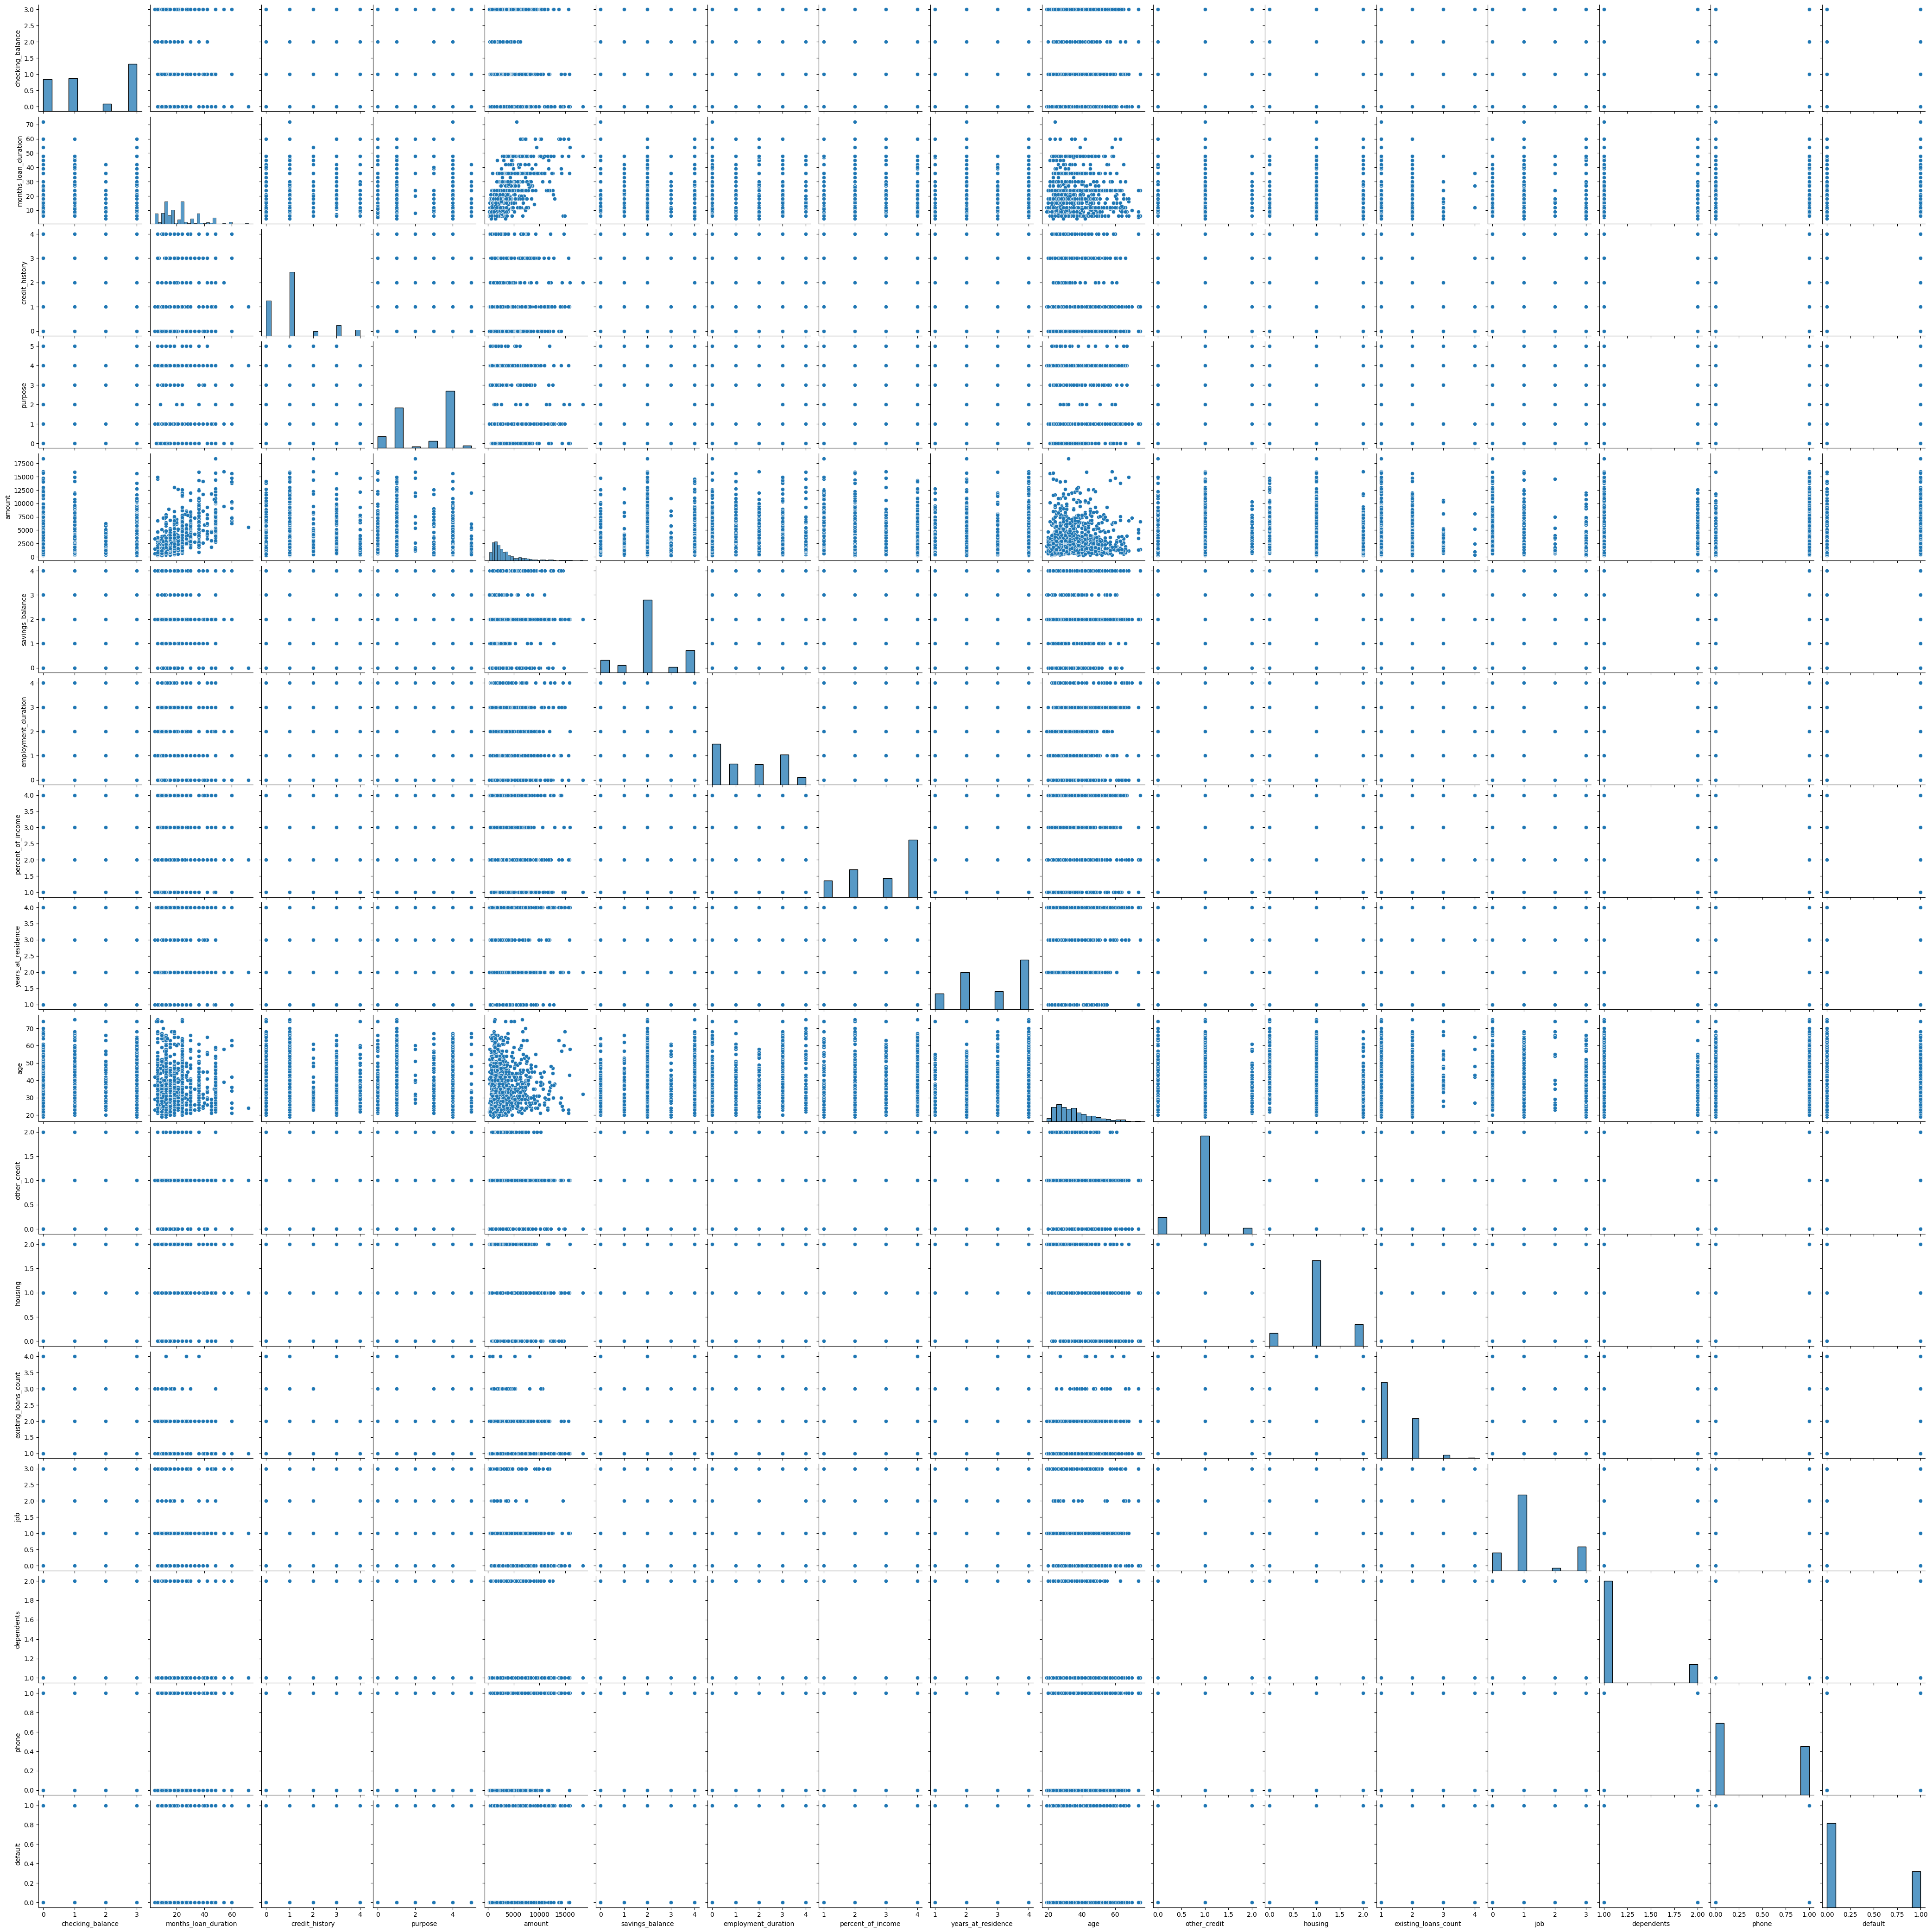

In [23]:
# To plot the pairplot the given data set 

sns.pairplot(df)

In [26]:
#splitting the data into independent and dependent columns 
X=df.drop('default', axis=1)
y=df.pop('default')

In [29]:
#to import the library to split the data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test,train_label,test_label=train_test_split(X,y,test_size=0.3,random_state=1)

In [31]:
# awaking Decision tree funstion 

dt_model=DecisionTreeClassifier(criterion='entropy')

In [32]:
dt_model.fit(X_train,train_label)

DecisionTreeClassifier(criterion='entropy')

In [34]:
#In deceion tree model we can identify by how much an independdent variable is important to the decision tree 

print(pd.DataFrame(dt_model.feature_importances_,columns=["imp"],index=X_train.columns))

                           imp
checking_balance      0.135197
months_loan_duration  0.077393
credit_history        0.057002
purpose               0.065046
amount                0.212127
savings_balance       0.072570
employment_duration   0.045067
percent_of_income     0.032566
years_at_residence    0.031958
age                   0.117788
other_credit          0.045786
housing               0.013220
existing_loans_count  0.024294
job                   0.032694
dependents            0.031387
phone                 0.005906


In [41]:
#now let us predict the dependent variable for X_test 

y_predict=dt_model.predict(X_test)

In [44]:
print(dt_model.score(X_train,train_label))
print(dt_model.score(X_test,test_label))

1.0
0.6633333333333333


In [45]:
# to print confusion metrics 

print(metrics.confusion_matrix(test_label,y_predict))

[[165  49]
 [ 52  34]]


IT CAN OBSERVED BY ABOVE CONFUSION MATRIX THE NON DEFAULTER CLASS IS NOT THAT ACCURATE, HENCE WE USE  REGULARISATION 

In [47]:
#awaking deceion tree function 

reg_dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [50]:
#training the model with train data set as splitted before 
reg_dt_model.fit(X_train,train_label)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [51]:
reg_y_predict=reg_dt_model.predict(X_test)

In [53]:
print(reg_dt_model.score(X_test,test_label))

0.75


We can observe when the decision tree target columns are comepletly homogenous, it was in the overfit sitiuation, which failed in production
Hence by limiting the depth of the decision tree, the accuracy increased from 66% to 75%